In [1]:
# general libraries
import numpy as np
import pandas as pd 

# data visualiztion libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# required libraries
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

# warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Importing the dataset

In [2]:
df = pd.read_csv("C:\\Users\\revon\\OneDrive - University of Bristol\\MSc DS @UoB\\TB-2\\Advanced Data Analytics\\Summative Assessment ADA\\Summative ADA\\Raw\\Industry by occupation raw.csv")
df.head()

,date,geography,geography code,Occupation: All categories: Occupation; Industry: All categories: Industry; measures: Value,"Occupation: All categories: Occupation; Industry: A, B, D, E Agriculture, energy and water; measures: Value",Occupation: All categories: Occupation; Industry: C Manufacturing; measures: Value,Occupation: All categories: Occupation; Industry: F Construction; measures: Value,"Occupation: All categories: Occupation; Industry: G, I Distribution, hotels and restaurants; measures: Value","Occupation: All categories: Occupation; Industry: H, J Transport and communication; measures: Value","Occupation: All categories: Occupation; Industry: K, L, M, N Financial, Real Estate, Professional and Administrative activities; measures: Value",...,"Occupation: 8. Process, plant and machine operatives; Industry: R, S, T, U Other; measures: Value",Occupation: 9. Elementary occupations; Industry: All categories: Industry; measures: Value,"Occupation: 9. Elementary occupations; Industry: A, B, D, E Agriculture, energy and water; measures: Value",Occupation: 9. Elementary occupations; Industry: C Manufacturing; measures: Value,Occupation: 9. Elementary occupations; Industry: F Construction; measures: Value,"Occupation: 9. Elementary occupations; Industry: G, I Distribution, hotels and restaurants; measures: Value","Occupation: 9. Elementary occupations; Industry: H, J Transport and communication; measures: Value","Occupation: 9. Elementary occupations; Industry: K, L, M, N Financial, Real Estate, Professional and Administrative activities; measures: Value","Occupation: 9. Elementary occupations; Industry: O, P, Q Public administration, education and health; measures: Value","Occupation: 9. Elementary occupations; Industry: R, S, T, U Other; measures: Value"
0,2011,Darlington,E06000005,49215,915,4917,3759,10850,4709,6724,...,29,5674,130,488,257,2057,698,876,938,230
1,2011,County Durham,E06000047,228857,7807,30094,18873,45687,14910,25805,...,217,28218,915,4030,2044,9524,2002,3762,4777,1164
2,2011,Hartlepool,E06000001,37894,1619,4424,3778,7617,2224,4508,...,59,4779,230,547,322,1514,309,774,818,265
3,2011,Middlesbrough,E06000002,54709,1342,4456,4632,12868,4279,6963,...,56,8085,177,478,453,2903,728,1410,1454,482
4,2011,Northumberland,E06000057,147827,6614,13652,11697,30457,9919,19010,...,112,16309,1255,1465,954,5772,1085,2239,2767,772


- Industry by Occupation Dataset

# Preparing the dataset

In [3]:
df = df.drop(['date','geography','geography code','Occupation: All categories: Occupation; Industry: All categories: Industry; measures: Value'], axis = 1)
df

,"Occupation: All categories: Occupation; Industry: A, B, D, E Agriculture, energy and water; measures: Value",Occupation: All categories: Occupation; Industry: C Manufacturing; measures: Value,Occupation: All categories: Occupation; Industry: F Construction; measures: Value,"Occupation: All categories: Occupation; Industry: G, I Distribution, hotels and restaurants; measures: Value","Occupation: All categories: Occupation; Industry: H, J Transport and communication; measures: Value","Occupation: All categories: Occupation; Industry: K, L, M, N Financial, Real Estate, Professional and Administrative activities; measures: Value","Occupation: All categories: Occupation; Industry: O, P, Q Public administration, education and health; measures: Value","Occupation: All categories: Occupation; Industry: R, S, T, U Other; measures: Value","Occupation: 1. Managers, directors and senior officials; Industry: All categories: Industry; measures: Value","Occupation: 1. Managers, directors and senior officials; Industry: A, B, D, E Agriculture, energy and water; measures: Value",...,"Occupation: 8. Process, plant and machine operatives; Industry: R, S, T, U Other; measures: Value",Occupation: 9. Elementary occupations; Industry: All categories: Industry; measures: Value,"Occupation: 9. Elementary occupations; Industry: A, B, D, E Agriculture, energy and water; measures: Value",Occupation: 9. Elementary occupations; Industry: C Manufacturing; measures: Value,Occupation: 9. Elementary occupations; Industry: F Construction; measures: Value,"Occupation: 9. Elementary occupations; Industry: G, I Distribution, hotels and restaurants; measures: Value","Occupation: 9. Elementary occupations; Industry: H, J Transport and communication; measures: Value","Occupation: 9. Elementary occupations; Industry: K, L, M, N Financial, Real Estate, Professional and Administrative activities; measures: Value","Occupation: 9. Elementary occupations; Industry: O, P, Q Public administration, education and health; measures: Value","Occupation: 9. Elementary occupations; Industry: R, S, T, U Other; measures: Value"
0,915,4917,3759,10850,4709,6724,15326,2015,4665,96,...,29,5674,130,488,257,2057,698,876,938,230
1,7807,30094,18873,45687,14910,25805,75768,9913,20311,625,...,217,28218,915,4030,2044,9524,2002,3762,4777,1164
2,1619,4424,3778,7617,2224,4508,12059,1665,3046,121,...,59,4779,230,547,322,1514,309,774,818,265
3,1342,4456,4632,12868,4279,6963,17718,2451,3910,81,...,56,8085,177,478,453,2903,728,1410,1454,482
4,6614,13652,11697,30457,9919,19010,49298,7180,15644,572,...,112,16309,1255,1465,954,5772,1085,2239,2767,772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2051,12573,6650,15159,4529,9987,23852,2955,6276,164,...,69,9871,297,2075,703,2911,643,1454,1448,340
344,749,5697,2248,5615,1394,2483,9149,1065,1957,43,...,24,4442,183,1103,303,1137,240,578,779,119
345,813,5872,3542,8259,2386,4964,12980,1599,3198,54,...,31,4999,143,883,302,1563,335,710,849,214
346,1936,4078,3281,9396,2884,6373,13259,2003,5522,191,...,47,4824,286,374,225,2072,402,563,704,198


In [4]:
df.select_dtypes(exclude=['int64']).columns # checking for any categorical columns

Index([], dtype='object')

In [5]:
df.columns[df.isna().any()].tolist() # checking for null values

[]

In [6]:
# scaling the data
scale = StandardScaler().fit(df)
df_stand = pd.DataFrame(scale.transform(df))
df_stand.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,-0.674099,-0.389123,-0.608784,-0.523986,-0.427322,-0.615461,-0.436587,-0.689866,-0.726864,-0.676969,...,-0.892288,-0.463357,-0.685448,-0.266415,-0.606341,-0.473907,-0.264125,-0.475910,-0.300438,-0.528945
1,4.602532,4.656132,3.686063,2.713934,1.620761,1.197174,3.660603,2.326673,2.413692,3.683738,...,2.833590,3.168865,2.431242,5.313564,5.235611,2.663959,1.514471,1.808697,3.894554,2.739141
2,-0.135105,-0.487916,-0.603384,-0.824477,-0.926242,-0.825974,-0.658048,-0.823544,-1.051839,-0.470887,...,-0.297733,-0.607557,-0.288418,-0.173468,-0.393847,-0.702093,-0.794703,-0.556655,-0.431566,-0.406480
3,-0.347181,-0.481503,-0.360709,-0.336424,-0.513654,-0.592756,-0.274440,-0.523342,-0.878412,-0.800619,...,-0.357189,-0.074904,-0.498844,-0.282169,0.034411,-0.118392,-0.223206,-0.053186,0.263411,0.352808
4,3.689151,1.361296,1.646906,1.298383,0.618704,0.551671,1.866278,1.282839,1.476905,3.246843,...,0.752648,1.250122,3.781145,1.272726,1.672249,1.087252,0.263725,0.603064,1.698166,1.367524


 - dropped categorical columns 
 - no null values
 - scaled the data using StandardScaler()

# PCA

In [7]:
Sigma = np.cov(df_stand.T)
print(Sigma)
eval, evec = LA.eig(Sigma)

[[1.00288184 0.6172966  0.58402422 ... 0.30707186 0.53367429 0.4305894 ]
 [0.6172966  1.00288184 0.76946086 ... 0.60881763 0.82911886 0.65267098]
 [0.58402422 0.76946086 1.00288184 ... 0.80095018 0.86961389 0.84205176]
 ...
 [0.30707186 0.60881763 0.80095018 ... 1.00288184 0.85337073 0.91691849]
 [0.53367429 0.82911886 0.86961389 ... 0.85337073 1.00288184 0.90274941]
 [0.4305894  0.65267098 0.84205176 ... 0.91691849 0.90274941 1.00288184]]


Sorted eigenvalues [ 6.30470391e+01+0.00000000e+00j  9.81624276e+00+0.00000000e+00j
  4.17783561e+00+0.00000000e+00j  2.34621571e+00+0.00000000e+00j
  1.53680652e+00+0.00000000e+00j  1.16533371e+00+0.00000000e+00j
  1.06990863e+00+0.00000000e+00j  7.41306615e-01+0.00000000e+00j
  5.24113047e-01+0.00000000e+00j  4.43212773e-01+0.00000000e+00j
  4.18697894e-01+0.00000000e+00j  3.46337999e-01+0.00000000e+00j
  3.19213202e-01+0.00000000e+00j  3.00720118e-01+0.00000000e+00j
  2.39493180e-01+0.00000000e+00j  2.24476259e-01+0.00000000e+00j
  2.16455314e-01+0.00000000e+00j  1.86609449e-01+0.00000000e+00j
  1.56585908e-01+0.00000000e+00j  1.45330890e-01+0.00000000e+00j
  1.35428514e-01+0.00000000e+00j  1.21904153e-01+0.00000000e+00j
  1.07764721e-01+0.00000000e+00j  9.94142496e-02+0.00000000e+00j
  9.83218187e-02+0.00000000e+00j  8.68860768e-02+0.00000000e+00j
  8.31343680e-02+0.00000000e+00j  8.14969843e-02+0.00000000e+00j
  6.79998179e-02+0.00000000e+00j  6.49418964e-02+0.00000000e+00j
  6.24

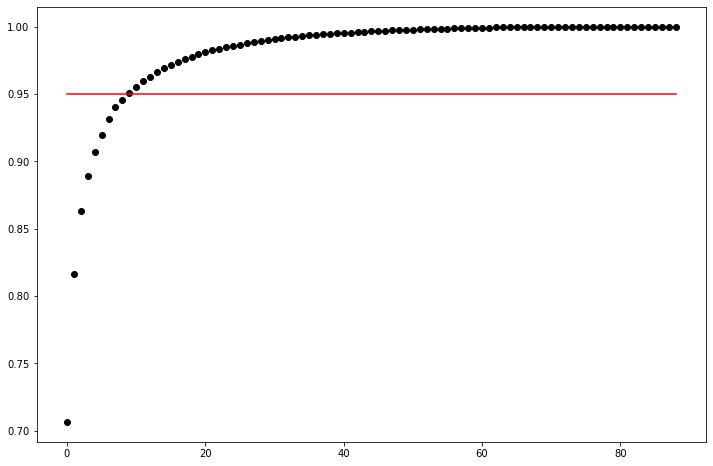

In [8]:
# sorting the eigenvalues 
sorted_eval = np.sort(eval)
eval = sorted_eval[::-1]  # reverse the order so that it is decreasing
print("Sorted eigenvalues " + str(eval))
cumuleval = np.cumsum(eval)
total = np.sum(eval)
cumuleval = cumuleval/total

# plotting cumulative sum of eigenvalues with a threshold at 0.95
plt.figure(figsize=(12,8))
plt.plot(cumuleval, 'ok')
xvals = range(90-1)
plt.plot(xvals, 0.95*np.ones(np.shape(eval)), 'r-')
plt.show()

 - we require 11 eigenvectors for the proportion of variance explained to exceed 0.95

Explained variance ratio [0.70635808 0.10997792 0.04680708 0.02628622 0.01721787 0.01305601
 0.0119869  0.00830535 0.00587199 0.00496561 0.00469095]


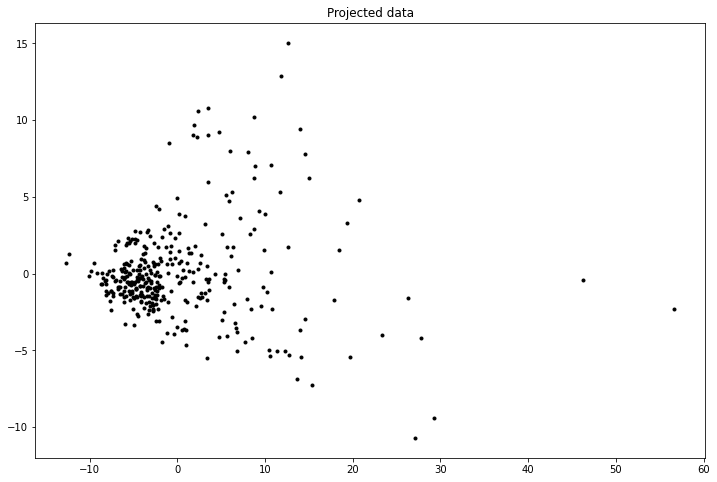

In [9]:
# applying PCA
pca = PCA(n_components=11, random_state=10)
pca.fit(df_stand)
# This should equal the sum of the first two values in the cumulative proportion plot
print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# projecting data onto first two principal components
pca_p = pca.transform(df_stand) # automatically subtracts off the mean of each variable
plt.figure(figsize=(12,8))
plt.plot(pca_p[:,0], pca_p[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [10]:
# storing the first two principal components for visualizing on tableau
first = pca_p[:,0]
second = pca_p[:,1]
pca_projection = pd.DataFrame(first, columns = ['PCA 1'])
pca_projection['PCA 2'] = second 
pca_projection

,PCA 1,PCA 2
0,-4.576477,-0.203076
1,27.101635,-10.707584
2,-6.083050,-1.499436
3,-3.505410,-1.048006
4,12.715824,-5.295283
...,...,...
343,0.772403,-3.577074
344,-8.120376,-1.421223
345,-6.080191,-1.103357
346,-5.655884,-0.551432


In [11]:
pd.DataFrame(pca_projection).to_csv(r'D:\projection1.csv', index=False)

# t-SNE

In [12]:
# applying t-sne
time_start = time.time()
tsne = TSNE(random_state=10)
tsne_p = tsne.fit_transform(df_stand)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 1.2817862033843994 seconds


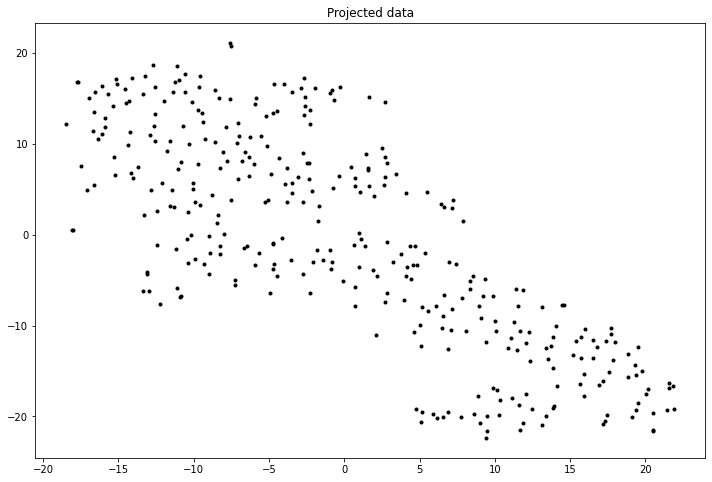

In [13]:
# projecting data onto first two components
plt.figure(figsize=(12,8))
plt.plot(tsne_p[:,0], tsne_p[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [14]:
first = tsne_p[:,0]
second = tsne_p[:,1]
tsne_projection = pd.DataFrame(first, columns = ['TSNE 1'])
tsne_projection['TSNE 2'] = second 
tsne_projection

,TSNE 1,TSNE 2
0,-8.244148,7.333529
1,20.512453,-19.619978
2,-10.872550,7.952526
3,2.486768,9.532770
4,21.569500,-16.357098
...,...,...
343,7.228293,3.784157
344,-13.231849,17.438358
345,-10.609465,15.745810
346,-11.562735,10.359225


In [15]:
pd.DataFrame(tsne_projection).to_csv(r'D:\projection2.csv', index=False)

# Projections

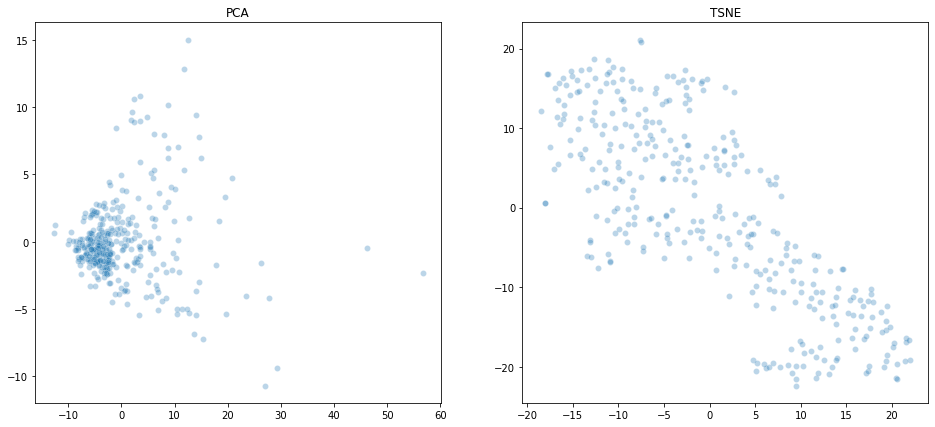

In [16]:
# both the projections
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x=pca_p[:,0], y=pca_p[:,1],
    data=df_stand,
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=tsne_p[:,0], y=tsne_p[:,1],
    data=df_stand,
    alpha=0.3,
    ax=ax2
)

ax1.title.set_text('PCA')
ax2.title.set_text('TSNE')
plt.show()